In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib .pyplot as plt

In [2]:
g_open = [[1396.71]]
r_open = [[0.20]]

In [4]:
dataset1 = pd.read_csv("C:/Users/hp/anaconda3/GOOG.csv")
dataset1 = dataset1.dropna()
X1=dataset1.iloc[: , 1:2].values
y1=dataset1.iloc[: , 2].values

In [5]:
dataset2 = pd.read_csv("C:/Users/hp/anaconda3/XRP-USD.csv")
dataset2 = dataset2.dropna()
X2=dataset2.iloc[: , 1:2].values
y2=dataset2.iloc[: , 2].values

In [6]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1, test_size=0.15, random_state=0)  #for google data
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2, test_size=0.35, random_state=0)  #for ripple data

In [8]:
regressor1 = RandomForestRegressor(n_estimators = 140, random_state = 0)
regressor1.fit(X_train1, y_train1)
y_pred1 = regressor1.predict(X_test1)
Y_predicted1 = regressor1.predict(g_open)
print("High predicted for today of Google using Random Forest is - ",Y_predicted1)
rms1 = sqrt(mean_squared_error(y_test1, y_pred1))
print("Root Mean squared error for Google's stock is - ",rms1)
print("----------------------------------------------------------------------") 

High predicted for today of Google using Random Forest is -  [1411.68354036]
Root Mean squared error for Google's stock is -  13.985342299097793
----------------------------------------------------------------------


In [9]:
regressor2 = RandomForestRegressor(n_estimators = 140, random_state = 0)
regressor2.fit(X_train2, y_train2)
y_pred2 = regressor2.predict(X_test2)
Y_predicted2 = regressor2.predict(r_open)
print("High predicted for today of Ripple using Random Forest is - ",Y_predicted2)
rms2 = sqrt(mean_squared_error(y_test2, y_pred2))
print("Root Mean squared error for ripple's stock is - ",rms2)

High predicted for today of Ripple using Random Forest is -  [0.20228698]
Root Mean squared error for ripple's stock is -  0.009213839063553376


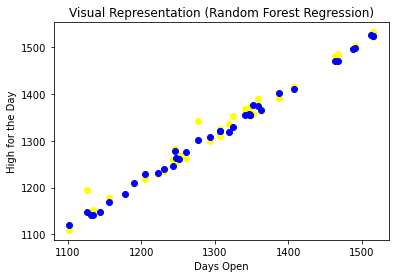

In [12]:
X_grid1 = np.arange(min(X_test1), max(X_test1), 10)
X_grid1= X_grid1.reshape((len(X_grid1), 1))
plt.scatter(X_test1, y_test1, color = 'yellow')
plt.scatter(X_test1,y_pred1,color='blue')
plt.title('Visual Representation (Random Forest Regression)')
plt.xlabel('Days Open')
plt.ylabel('High for the Day')
plt.show()

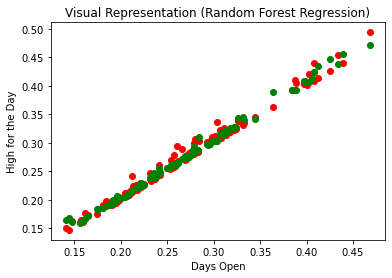

In [14]:
X_grid2 = np.arange(min(X_test2), max(X_test2), 10)
X_grid2 = X_grid2.reshape((len(X_grid2), 1))
plt.scatter(X_test2, y_test2, color = 'red')
plt.scatter(X_test2,y_pred2,color='green')
plt.title('Visual Representation (Random Forest Regression)')
plt.xlabel('Days Open')
plt.ylabel('High for the Day')
plt.show()